# Logistic Regression

In [ ]:
# Example 6-1. The logistic function in Python for one independent variable 
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p


1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


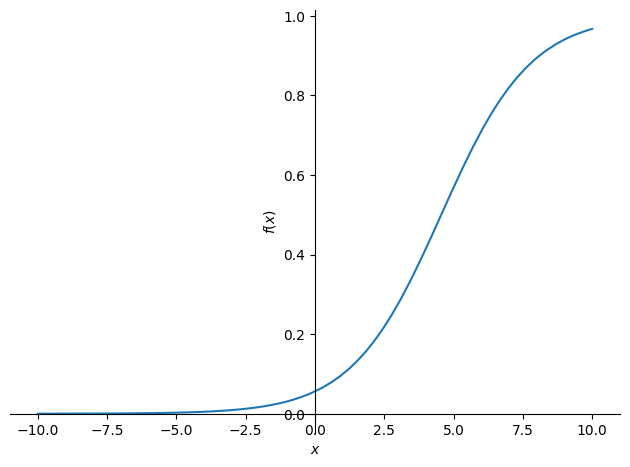

In [1]:
# Example 6-2. Using SymPy to plot a logistic function 
from sympy import *
b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0,-2.823)
p = p.subs(b1, 0.620)
print(p)

plot(p)

## Using Scipy

In [7]:
# Example 6-3. Using a plain logistic regression in SciPy 
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Perform logistic regression
# Turn off penalty
model = LogisticRegression(penalty=None)
model.fit(X, Y)

# print beta1
print("Beta 1:", model.coef_.flatten()) # 0.69267212

# print beta0
print("Beta 0:", model.intercept_.flatten()) # -3.17576395



Beta 1: [0.69267212]
Beta 0: [-3.17576395]


## Maximum Likelihood

In [8]:
# Example 6-4. Calculating the joint likelihood of observing all the points for a given logistic regression 
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1.0 - logistic_function(p.x))

print(joint_likelihood) # 4.7911180221699105e-05


4.7911180221699105e-05


In [11]:
# Example 6-5. Compressing the joint likelihood calculation without an if expression for p in patient_data:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    joint_likelihood *= logistic_function(p.x) ** p.y * \
                        (1.0 - logistic_function(p.x)) ** (1.0 - p.y)

print(joint_likelihood) # 4.7911180221699105e-05

4.7911180221699105e-05


In [12]:
# Example 6-5. Compressing the joint likelihood calculation without an if expression for p in patient_data:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x) ** p.y * \
                                 (1.0 - logistic_function(p.x)) ** (1.0 - p.y))

joint_likelihood = math.exp(joint_likelihood)

print(joint_likelihood) # 4.7911180221699105e-05

0.00013023609057667072


In [15]:
# Example 6-8. Using gradient descent on logistic regression 
from sympy import *
import pandas as pd

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
   * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

# Partial derivative for m, with points substituted
d_b1 = diff(joint_likelihood, b1) \
         .subs(n, len(points) - 1).doit() \
         .replace(x, lambda i: points[i].x) \
         .replace(y, lambda i: points[i].y)

# Partial derivative for m, with points substituted
d_b0 = diff(joint_likelihood, b0) \
         .subs(n, len(points) - 1).doit() \
         .replace(x, lambda i: points[i].x) \
         .replace(y, lambda i: points[i].y)

# compile using lambdify for faster computation
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# Perform Gradient Descent
b1 = 0.01
b0 = 0.01
L = .01

for j in range(100_000):
    b1 += d_b1(b1, b0) * L

b0 += d_b0(b1, b0) * L

print(b1, b0)
# 0.6926693075370812 -3.175751550409821


0.14227747988864586 -0.01175412847565707


In [48]:
# Example 6-9. Doing a multivariable logistic regression on employee data 
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]

# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1]

# build logistic regression
fit = LogisticRegression(penalty=None).fit(inputs.values, output.values)

# Print coefficients:
print("COEFFICIENTS: {0}".format(fit.coef_.flatten()))
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "WILL LEAVE: {0}".format(probabilities)
    else:
        return "WILL STAY: {0}".format(probabilities)

# Test a prediction
while True:
    n = input("Predict employee will stay or leave {sex}, {age}, {promotions}, {years employed}: ") 
    if n == "":   
        break        
    else:      
        (sex, age, promotions, years_employed) = n.split(",")  
        print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)))


COEFFICIENTS: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
INTERCEPT: [-2.73485302]
WILL LEAVE: [[0.28570264 0.71429736]]
WILL STAY: [[0.94932047 0.05067953]]


In [49]:
# Example 6-10. Calculating the log likelihood of the fit 
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Sum the log-likelihoods
log_likelihood_fit = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood_fit += log(logistic_function(p.x))
    elif p.y == 0.0:
        log_likelihood_fit += log(1.0 - logistic_function(p.x))

print(log_likelihood_fit) # -9.946161673231583 Using some clever binary multiplication and


-9.946161673231583


In [50]:
# Example 6-14. Calculating the  for a logistic regression 
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",") \
                                .itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

# calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
   for p in patient_data)

# calculate R-Square
r2 = (log_likelihood - log_likelihood_fit) / log_likelihood

print(r2)  # 0.306456105756576


0.306456105756576


In [52]:
# Example 6-15. Calculating a p-value for a given logistic regression 
import pandas as pd
from math import log, exp
from scipy.stats import chi2

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

# calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                     for p in patient_data)

# calculate p-value
chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1) # 1 degree of freedom (n - 1)

print(p_value)  # 0.0016604875618753787


0.0016604875618753787


In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Load the data
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

# "random_state" is the random seed, which we fix to 7
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy Mean: %.3f (stdev=%.3f)" % (results.mean(), results.std()))


Accuracy Mean: 0.611 (stdev=0.000)
